<a href="https://colab.research.google.com/github/oscar066/ComputerVision_Cats_Dogs/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from PIL import Image

In [3]:
#setting the image size to 150, 150
image_size = (150, 150)

#Load the cats and dogs dataset from tensorflow
dataset_name = 'cats_vs_dogs'
dataset_builder = tfds.builder(dataset_name)
dataset_builder.download_and_prepare()

#Load the dataset and split it
dataset = dataset_builder.as_dataset(split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], shuffle_files=True)

# Extract the train, validation, and test splits
train_dataset = dataset[0]
validation_dataset = dataset[1]
test_dataset = dataset[2]

In [4]:
# function to resize the images
def resize_image(sample):
  image = sample['image']
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, image_size)
  image /= 255.0
  sample['image'] = image
  return sample

train_dataset = train_dataset.map(resize_image)
Validation_dataset = validation_dataset.map(resize_image)
test_dataset = test_dataset.map(resize_image)

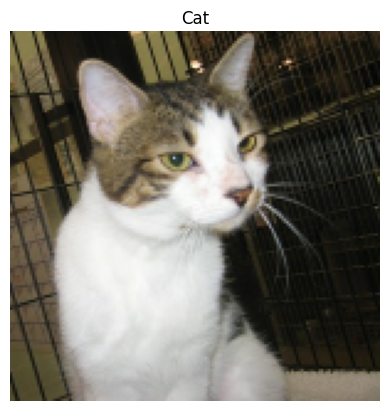

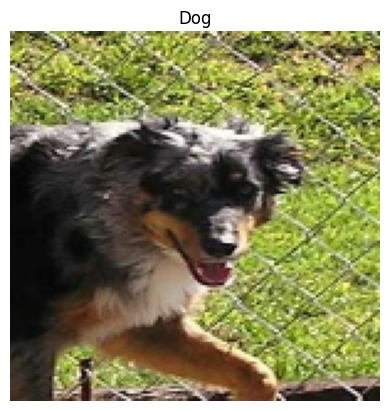

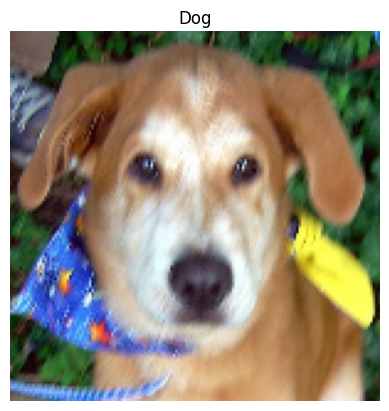

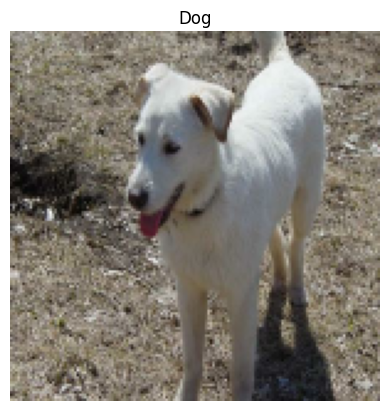

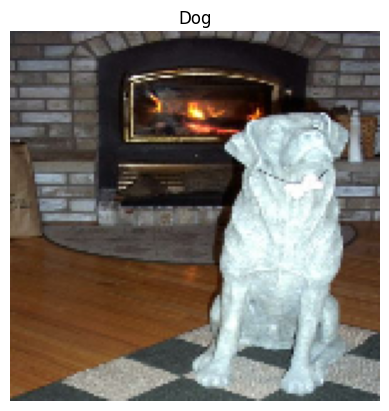

In [5]:
# Inspect a few samples from the train dataset
num_samples = 5

# Iterate over the train dataset and display the samples
for sample in train_dataset.take(num_samples):
  image = sample['image']
  label = sample['label']

  # convert the image tensor to a numpy array
  image = image.numpy()

  # convert the label into a string
  label = 'Cat' if label == 0 else 'Dog'

  # Display the image and label
  plt.imshow(image)
  plt.title(label)
  plt.axis('off')
  plt.show()

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
import numpy as np

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# Convert the train_dataset and validation_dataset to arrays
train_images = np.array([example['image'] for example in train_dataset])
train_labels = np.array([example['label'] for example in train_dataset])
validation_images = np.array([example['image'] for example in validation_dataset])
validation_labels = np.array([example['label'] for example in validation_dataset])


train_generator = train_datagen.flow(
    train_images,
    train_labels,
    #target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow(
    validation_images,
    validation_labels,
    #target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary'
)

<ipython-input-10-9a3e5f0a2ab4>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  validation_images = np.array([example['image'] for example in validation_dataset])


TypeError: ignored

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_dataset,
    validation_steps=50
)